In [155]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import skew

In [156]:
train=pd.read_csv('Train.csv')
test=pd.read_csv('Test.csv')

In [157]:
train.head()

,Store_Ratio,Basket_Ratio,Category_1,Store_Score,Category_2,Store_Presence,Score_1,Score_2,Score_3,Score_4,time,popularity
0,0.407,0.00380,2,-35.865,1,0.9920,0.944,0.0988,0.1100,113.911,189125,4
1,0.234,0.10500,0,-19.884,1,0.9440,0.900,0.1290,0.0382,76.332,186513,4
2,0.668,0.72600,9,-7.512,1,0.0387,0.000,0.1340,0.4530,124.075,172143,4
3,0.184,0.00561,4,-34.357,1,0.8490,0.931,0.1110,0.0641,79.037,184000,5
4,0.231,0.13100,6,-22.842,1,0.9370,0.000,0.1090,0.0677,109.560,186507,3


In [158]:
train.shape, test.shape

((18208, 12), (12140, 11))

In [163]:
train.drop('time','popularity',axis=1)

TypeError: ignored

In [160]:
print(train.dtypes)

categorical_features_indices = np.where(train.drop('time','popularity',axis=1).dtypes != np.float)[0]

Store_Ratio       float64
Basket_Ratio      float64
Category_1          int64
Store_Score       float64
Category_2          int64
Store_Presence    float64
Score_1           float64
Score_2           float64
Score_3           float64
Score_4           float64
time                int64
popularity          int64
dtype: object


TypeError: ignored

4    12850
3     1784
5      376
1      261
0       14
Name: popularity, dtype: int64

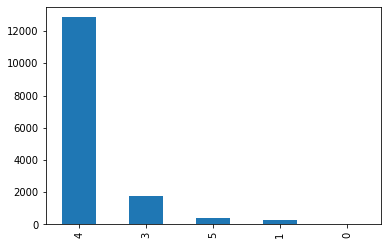

In [120]:
train.drop_duplicates()['popularity'].value_counts().plot(kind='bar')
train.drop_duplicates()['popularity'].value_counts()

In [121]:
train= train.drop_duplicates()

In [122]:
for column in train.columns:
  print(column, skew(train[column]))  

Store_Ratio -0.4754096715691381
Basket_Ratio -0.17322619179640403
Category_1 0.04882608854275413
Store_Score -1.2387483176467253
Category_2 -0.6114760990557822
Store_Presence 0.16029494801504174
Score_1 0.7186249709013992
Score_2 2.7925746331359202
Score_3 0.22695512939822893
Score_4 0.37006819644502337
time 8.802235569975831
popularity -3.11516394688019


In [123]:
test.head()

,Store_Ratio,Basket_Ratio,Category_1,Store_Score,Category_2,Store_Presence,Score_1,Score_2,Score_3,Score_4,time
0,0.164,0.994,1,-23.718,0,0.12400,0.99100,0.7890,0.00001,127.602,236436
1,0.586,0.636,4,-7.710,1,0.00208,0.32200,0.1070,0.35500,136.337,253631
2,0.457,0.743,0,-7.591,1,0.40400,0.00931,0.2010,0.68800,154.902,215669
3,0.423,0.748,5,-9.832,1,0.03000,0.22100,0.1690,0.42800,93.977,325200
4,0.802,0.756,2,-10.791,0,0.08430,0.00765,0.0521,0.96300,131.715,288293


In [124]:
train.shape, test.shape

((15285, 12), (12140, 11))

In [125]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15285 entries, 0 to 18207
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Store_Ratio     15285 non-null  float64
 1   Basket_Ratio    15285 non-null  float64
 2   Category_1      15285 non-null  int64  
 3   Store_Score     15285 non-null  float64
 4   Category_2      15285 non-null  int64  
 5   Store_Presence  15285 non-null  float64
 6   Score_1         15285 non-null  float64
 7   Score_2         15285 non-null  float64
 8   Score_3         15285 non-null  float64
 9   Score_4         15285 non-null  float64
 10  time            15285 non-null  int64  
 11  popularity      15285 non-null  int64  
dtypes: float64(8), int64(4)
memory usage: 1.5 MB


In [126]:
train.isnull().sum()

Store_Ratio       0
Basket_Ratio      0
Category_1        0
Store_Score       0
Category_2        0
Store_Presence    0
Score_1           0
Score_2           0
Score_3           0
Score_4           0
time              0
popularity        0
dtype: int64

In [127]:
test.isnull().sum()

Store_Ratio       0
Basket_Ratio      0
Category_1        0
Store_Score       0
Category_2        0
Store_Presence    0
Score_1           0
Score_2           0
Score_3           0
Score_4           0
time              0
dtype: int64

In [13]:
# mean_encoded_category1 = train.groupby(['Category_1'])['popularity'].mean().to_dict()
# mean_encoded_category1

In [14]:
# train['Category_1'+'mean'] =  train['Category_1'].map(mean_encoded_category1)
# test['Category_1'+'mean'] =  test['Category_1'].map(mean_encoded_category1)

In [15]:
# mean_encoded_category2 = train.groupby(['Category_2'])['popularity'].mean().to_dict()
# mean_encoded_category2

In [16]:
# train['Category_2'+'mean'] =  train['Category_2'].map(mean_encoded_category2)
# test['Category_2'+'mean'] =  test['Category_2'].map(mean_encoded_category2)

In [128]:
skew(np.log(train['time']))

0.18913923008747008

In [129]:
train['time']=np.log(train['time'])
test['time']=np.log(test['time'])

Store_Ratio


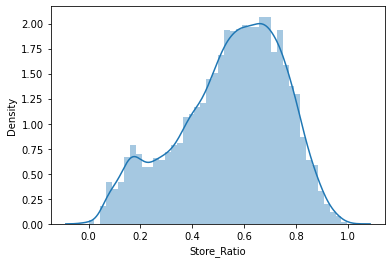

Basket_Ratio


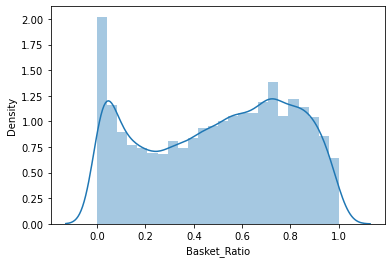

Category_1


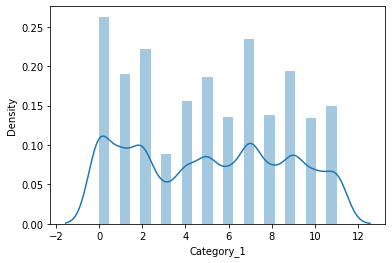

Store_Score


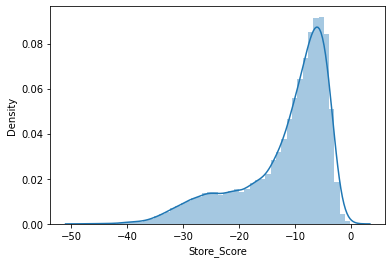

Category_2


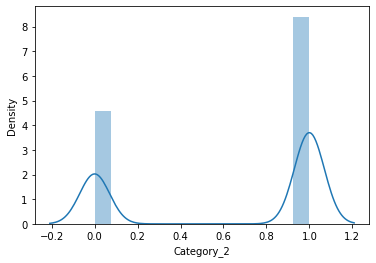

Store_Presence


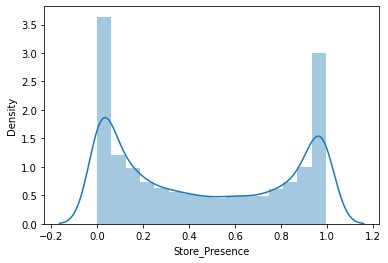

Score_1


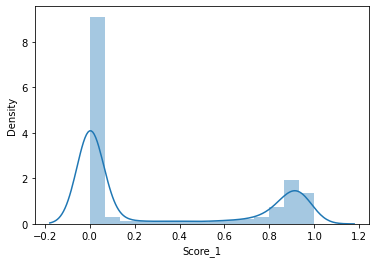

Score_2


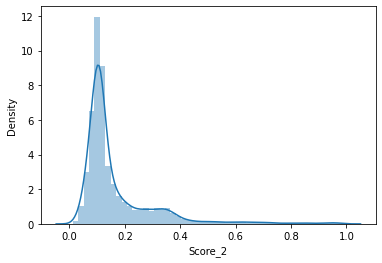

Score_3


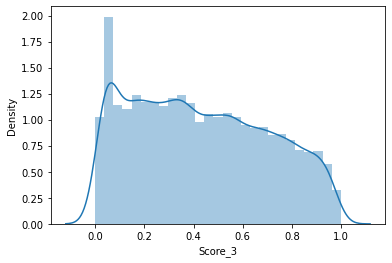

Score_4


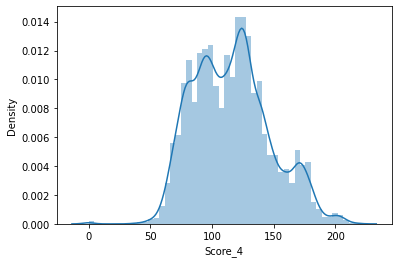

time


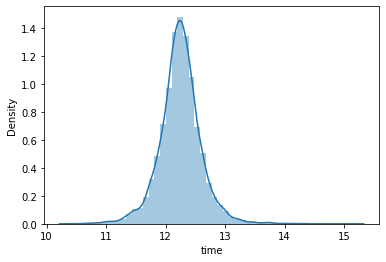

popularity


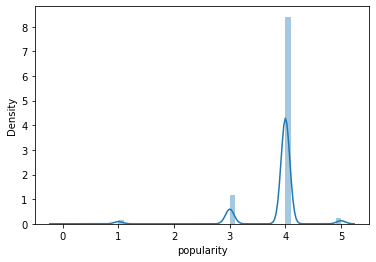

In [130]:
for column in train.columns:
    print(column)
    sns.distplot(train[column])
    plt.show()

4    12850
3     1784
5      376
1      261
0       14
Name: popularity, dtype: int64

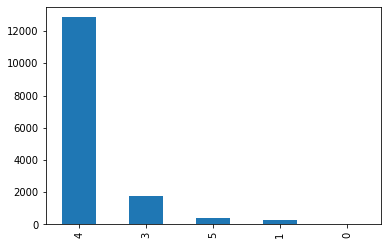

In [131]:
train['popularity'].value_counts().plot(kind='bar')
train['popularity'].value_counts()

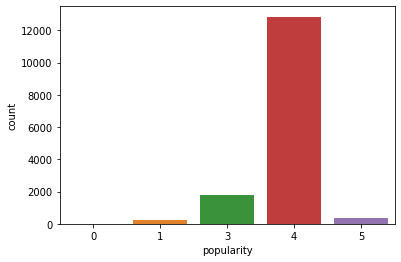

In [132]:
sns.countplot(train.popularity)

In [133]:
X = train.drop('popularity',axis=1)
Y = train['popularity']

In [134]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_ = scaler.fit_transform(X)

In [135]:
X = pd.DataFrame(X_,columns=X.columns)

In [136]:
X.corr()

,Store_Ratio,Basket_Ratio,Category_1,Store_Score,Category_2,Store_Presence,Score_1,Score_2,Score_3,Score_4,time
Store_Ratio,1.000000,0.453653,0.042702,0.579793,-0.096637,-0.450610,-0.429869,-0.042446,0.615432,0.107917,-0.061551
Basket_Ratio,0.453653,1.000000,0.048168,0.821896,-0.108873,-0.811553,-0.583105,0.257677,0.519984,0.255437,0.168733
Category_1,0.042702,0.048168,1.000000,0.041479,-0.148276,-0.046148,-0.032720,0.017054,0.039376,0.002141,0.002674
Store_Score,0.579793,0.821896,0.041479,1.000000,-0.081731,-0.707084,-0.703222,0.136806,0.508327,0.261071,0.136135
Category_2,-0.096637,-0.108873,-0.148276,-0.081731,1.000000,0.096904,0.012108,-0.034441,-0.040082,-0.034771,-0.019331
Store_Presence,-0.450610,-0.811553,-0.046148,-0.707084,0.096904,1.000000,0.535580,-0.179129,-0.411032,-0.217470,-0.138537
Score_1,-0.429869,-0.583105,-0.032720,-0.703222,0.012108,0.535580,1.000000,-0.098179,-0.457041,-0.194036,-0.186499
Score_2,-0.042446,0.257677,0.017054,0.136806,-0.034441,-0.179129,-0.098179,1.000000,0.035843,0.018684,0.000529
Score_3,0.615432,0.519984,0.039376,0.508327,-0.040082,-0.411032,-0.457041,0.035843,1.000000,0.175598,0.007414
Score_4,0.107917,0.255437,0.002141,0.261071,-0.034771,-0.217470,-0.194036,0.018684,0.175598,1.000000,0.046673


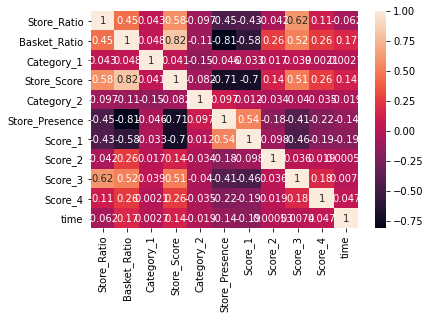

In [137]:
sns.heatmap(X.corr(),annot=True)

In [138]:
X.drop('Basket_Ratio', axis=1).corr()

,Store_Ratio,Category_1,Store_Score,Category_2,Store_Presence,Score_1,Score_2,Score_3,Score_4,time
Store_Ratio,1.000000,0.042702,0.579793,-0.096637,-0.450610,-0.429869,-0.042446,0.615432,0.107917,-0.061551
Category_1,0.042702,1.000000,0.041479,-0.148276,-0.046148,-0.032720,0.017054,0.039376,0.002141,0.002674
Store_Score,0.579793,0.041479,1.000000,-0.081731,-0.707084,-0.703222,0.136806,0.508327,0.261071,0.136135
Category_2,-0.096637,-0.148276,-0.081731,1.000000,0.096904,0.012108,-0.034441,-0.040082,-0.034771,-0.019331
Store_Presence,-0.450610,-0.046148,-0.707084,0.096904,1.000000,0.535580,-0.179129,-0.411032,-0.217470,-0.138537
Score_1,-0.429869,-0.032720,-0.703222,0.012108,0.535580,1.000000,-0.098179,-0.457041,-0.194036,-0.186499
Score_2,-0.042446,0.017054,0.136806,-0.034441,-0.179129,-0.098179,1.000000,0.035843,0.018684,0.000529
Score_3,0.615432,0.039376,0.508327,-0.040082,-0.411032,-0.457041,0.035843,1.000000,0.175598,0.007414
Score_4,0.107917,0.002141,0.261071,-0.034771,-0.217470,-0.194036,0.018684,0.175598,1.000000,0.046673
time,-0.061551,0.002674,0.136135,-0.019331,-0.138537,-0.186499,0.000529,0.007414,0.046673,1.000000


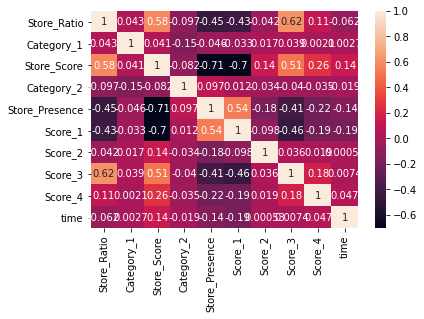

In [139]:
sns.heatmap(X.drop('Basket_Ratio', axis=1).corr(),annot=True)

In [140]:
X.drop('Basket_Ratio', axis=1,inplace=True)

In [141]:
test.drop('Basket_Ratio', axis=1,inplace=True)

In [142]:
#VIF to check for multicollinearity  luckily the VIF values are not above 10 so there is no multicollinearity 
from statsmodels.stats.outliers_influence import variance_inflation_factor 

# VIF data Frame
vif_data = pd.DataFrame()
vif_data['feature']=X.columns

# VIF for each feature
vif_data['VIF']=[variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
print(vif_data)

          feature       VIF
0     Store_Ratio  2.040463
1      Category_1  1.024446
2     Store_Score  3.309021
3      Category_2  1.042416
4  Store_Presence  2.081531
5         Score_1  2.091703
6         Score_2  1.067238
7         Score_3  1.771040
8         Score_4  1.088976
9            time  1.080030


In [143]:
!pip3 install catboost

In [144]:
from sklearn.model_selection import GridSearchCV
from catboost import CatBoostClassifier
cb_params={'depth':[2,3],'learning_rate':np.linspace(0.0001,0.001,15),'iterations':[3,4,5,6]}
cb_grid=GridSearchCV(estimator=CatBoostClassifier(verbose=0),param_grid=cb_params,cv=7,verbose=2)
cb_grid.fit(X,Y)
cb_grid.best_params_


Fitting 7 folds for each of 120 candidates, totalling 840 fits
[CV] depth=2, iterations=3, learning_rate=0.0001 .....................
[CV] ...... depth=2, iterations=3, learning_rate=0.0001, total=   0.1s
[CV] depth=2, iterations=3, learning_rate=0.0001 .....................
[CV] ...... depth=2, iterations=3, learning_rate=0.0001, total=   0.1s
[CV] depth=2, iterations=3, learning_rate=0.0001 .....................
[CV] ...... depth=2, iterations=3, learning_rate=0.0001, total=   0.1s
[CV] depth=2, iterations=3, learning_rate=0.0001 .....................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] ...... depth=2, iterations=3, learning_rate=0.0001, total=   0.1s
[CV] depth=2, iterations=3, learning_rate=0.0001 .....................
[CV] ...... depth=2, iterations=3, learning_rate=0.0001, total=   0.1s
[CV] depth=2, iterations=3, learning_rate=0.0001 .....................
[CV] ...... depth=2, iterations=3, learning_rate=0.0001, total=   0.1s
[CV] depth=2, iterations=3, learning_rate=0.0001 .....................
[CV] ...... depth=2, iterations=3, learning_rate=0.0001, total=   0.1s
[CV] depth=2, iterations=3, learning_rate=0.0001642857142857143 ......
[CV]  depth=2, iterations=3, learning_rate=0.0001642857142857143, total=   0.1s
[CV] depth=2, iterations=3, learning_rate=0.0001642857142857143 ......
[CV]  depth=2, iterations=3, learning_rate=0.0001642857142857143, total=   0.1s
[CV] depth=2, iterations=3, learning_rate=0.0001642857142857143 ......
[CV]  depth=2, iterations=3, learning_rate=0.0001642857142857143, total=   0.1s
[CV] depth=2, iterations=3, learning_rate=0.000164

[Parallel(n_jobs=1)]: Done 840 out of 840 | elapsed:   58.1s finished


{'depth': 2, 'iterations': 3, 'learning_rate': 0.0001}

In [90]:
from sklearn.model_selection import KFold ,StratifiedKFold
folds = StratifiedKFold(n_splits=7,shuffle=True ,random_state=42)

In [91]:
oof_preds = []
oof_scores = []

In [167]:
#https://www.youtube.com/watch?v=fKz-SgScM3Q   stratified k-fold cross validation
from sklearn.linear_model import LogisticRegression , RidgeClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import log_loss


for train_index, test_index in folds.split(X,Y):
    print('Train index', train_index,'Validation index',test_index)
    X1_train, X1_test = X.iloc[train_index],X.iloc[test_index]
    Y1_train, Y1_test = Y.iloc[train_index],Y.iloc[test_index]

   
    #eval_metric='Logloss',
    model = CatBoostClassifier(task_type= 'GPU',grow_policy = "Lossguide",use_best_model = True
                               )
    
    model.fit(X1_train,Y1_train,eval_set=(X1_test, Y1_test))
    
    Y1_pred = model.predict_proba(X1_test)
    score = log_loss(Y1_test,Y1_pred)
    
    oof_pred_fold = model.predict_proba(scaler.fit_transform(test))
    # oof_pred_fold = model.predict_proba(test)
    oof_preds.append(oof_pred_fold)
    print(np.shape(oof_preds))
    
    print(score)
    oof_scores.append(score)

print("Mean OOF Score :",np.mean(oof_scores))
final_preds = np.mean(np.array(oof_preds),axis=0)
    
    

Streaming output truncated to the last 5000 lines.
34:	learn: 0.4323737	test: 0.4796824	best: 0.4796824 (34)	total: 748ms	remaining: 20.6s
35:	learn: 0.4308607	test: 0.4791355	best: 0.4791355 (35)	total: 768ms	remaining: 20.6s
36:	learn: 0.4295359	test: 0.4788961	best: 0.4788961 (36)	total: 790ms	remaining: 20.6s
37:	learn: 0.4281701	test: 0.4784844	best: 0.4784844 (37)	total: 810ms	remaining: 20.5s
38:	learn: 0.4269792	test: 0.4781703	best: 0.4781703 (38)	total: 832ms	remaining: 20.5s
39:	learn: 0.4256946	test: 0.4781943	best: 0.4781703 (38)	total: 852ms	remaining: 20.5s
40:	learn: 0.4247061	test: 0.4782941	best: 0.4781703 (38)	total: 880ms	remaining: 20.6s
41:	learn: 0.4236350	test: 0.4784521	best: 0.4781703 (38)	total: 905ms	remaining: 20.6s
42:	learn: 0.4227037	test: 0.4781969	best: 0.4781703 (38)	total: 926ms	remaining: 20.6s
43:	learn: 0.4219381	test: 0.4782594	best: 0.4781703 (38)	total: 946ms	remaining: 20.6s
44:	learn: 0.4207554	test: 0.4782278	best: 0.4781703 (38)	total: 966m

In [168]:
submission = pd.DataFrame(final_preds)
submission.to_csv("submissioncatboosteval.csv",index=None)
submission

,0,1,2,3,4
0,0.023619,0.057030,0.279953,0.460366,0.179032
1,0.022706,0.027101,0.063156,0.859987,0.027051
2,0.022862,0.027041,0.099969,0.814917,0.035211
3,0.022781,0.028807,0.084220,0.828804,0.035388
4,0.022800,0.024437,0.045649,0.874639,0.032474
...,...,...,...,...,...
12135,0.022982,0.058091,0.219538,0.646828,0.052562
12136,0.022703,0.023839,0.032021,0.896744,0.024694
12137,0.022679,0.024641,0.039736,0.886621,0.026323
12138,0.022693,0.025075,0.037553,0.889789,0.024890


# Logistic Regression

In [36]:
X

,Store_Ratio,Category_1,Store_Score,Category_2,Store_Presence,Score_1,Score_2,Score_3,Score_4,time
0,-0.702180,-0.885768,-3.019404,0.739956,1.404413,1.579560,-0.489964,-1.171316,-0.064176,-0.327882
1,-1.561949,-1.450351,-1.019139,0.739956,1.276860,1.471119,-0.269121,-1.433540,-1.269205,-0.353710
2,0.594928,1.090270,0.529404,0.739956,-1.128839,-0.746998,-0.232557,0.081370,0.261749,-0.495808
3,-1.810437,-0.321186,-2.830655,0.739956,1.024412,1.547521,-0.400749,-1.338949,-1.182465,-0.378560
4,-1.576859,0.243396,-1.389378,0.739956,1.258259,-0.746998,-0.415375,-1.325801,-0.203697,-0.353770
...,...,...,...,...,...,...,...,...,...,...
15280,1.479546,-1.450351,0.543047,0.739956,-1.227905,1.375001,-0.451938,-0.751319,0.772569,0.392050
15281,0.798689,1.372561,0.951711,0.739956,-0.102305,-0.746998,-0.611355,0.830059,1.222174,-0.293806
15282,-0.722059,0.243396,0.172307,-1.351432,-0.025241,-0.746998,-0.437313,-0.908361,-0.097204,0.104789
15283,0.247045,-1.168059,0.573587,-1.351432,-0.197969,-0.746998,3.043536,0.154413,-0.291977,-0.689474


In [37]:
Y

0        4
1        4
2        4
3        5
4        3
        ..
18201    4
18202    4
18203    4
18206    4
18207    3
Name: popularity, Length: 15285, dtype: int64

In [38]:
model = LogisticRegression(max_iter=5000)
model.fit(X,Y)

oof_pred_fold = model.predict_proba(scaler.fit_transform(test))
# oof_pred_fold = model.predict_proba(test)

In [39]:
final_preds = np.array(oof_pred_fold)

In [40]:
submission = pd.DataFrame(final_preds)
submission.to_csv("submissionLogistic.csv",index=None)
submission

,0,1,2,3,4
0,4.349581e-06,0.046719,0.185097,0.676458,0.091722
1,9.468447e-09,0.004187,0.042115,0.946020,0.007677
2,4.155592e-09,0.007728,0.107894,0.867034,0.017343
3,1.279144e-06,0.006579,0.051086,0.929322,0.013011
4,4.026386e-10,0.000873,0.016693,0.978899,0.003535
...,...,...,...,...,...
12135,3.596586e-04,0.056926,0.309182,0.547133,0.086400
12136,6.779011e-08,0.001974,0.014910,0.980740,0.002376
12137,2.362012e-08,0.004359,0.039369,0.946884,0.009387
12138,2.946288e-07,0.004592,0.029105,0.962335,0.003967


In [41]:
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier , ExtraTreesClassifier , AdaBoostClassifier

# SVM

In [42]:
from sklearn.svm import SVC   
clf = SVC(kernel='rbf',probability=True)  
  
# fitting x samples and y classes  
clf.fit(X, Y)  

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [43]:
oof_pred_fold = clf.predict_proba(scaler.fit_transform(test))
# oof_pred_fold = clf.predict_proba(test)

In [44]:
final_preds = np.array(oof_pred_fold)

In [45]:
submission = pd.DataFrame(final_preds)
submission.to_csv("submissionSVC.csv",index=None)
submission

,0,1,2,3,4
0,0.000305,0.056484,0.304707,0.583331,0.055174
1,0.000103,0.016480,0.109136,0.851065,0.023216
2,0.000169,0.014779,0.112053,0.847867,0.025131
3,0.000092,0.018087,0.110937,0.845332,0.025551
4,0.000385,0.012967,0.109125,0.851714,0.025809
...,...,...,...,...,...
12135,0.000044,0.017791,0.111711,0.844956,0.025498
12136,0.000380,0.015449,0.111165,0.849792,0.023213
12137,0.000167,0.017395,0.111656,0.844845,0.025937
12138,0.000236,0.018526,0.107821,0.850611,0.022806


# CatBoost Classifier

In [46]:
!pip3 install catboost

In [47]:
from catboost import CatBoostClassifier
from sklearn.model_selection import RandomizedSearchCV

param_dist = {'learning_rate': [0.03, 0.1],
              'depth': [4, 6, 10],
              'l2_leaf_reg': [1, 3, 5, 7, 9]
              }

cbc = CatBoostClassifier()

cb_grid=RandomizedSearchCV(estimator=cbc, param_dist, scoring='accuracy', cv=3)
cb_grid.fit(X,Y)
cb_grid.best_params_

# cat_model = CatBoostClassifier(
#     iterations = 1000, # 1000 are ideal
#     loss_function='MultiClass',
#     bootstrap_type = "Bayesian",
#     eval_metric = 'MultiClass',
#     leaf_estimation_iterations = 100,
#     random_strength = 0.5,
#     depth = 7,
#     l2_leaf_reg = 5,
#     learning_rate=0.1,
#     bagging_temperature = 0.5,
#     task_type = "GPU",
# )

# # training the model
# cat_model.fit(X,Y)

# # predicting the model output
# y_pred_cat = cat_model.predict_proba(scaler.fit_transform(test))

SyntaxError: ignored

In [ ]:
final_preds = np.array(y_pred_cat)

In [ ]:
submission = pd.DataFrame(final_preds)
submission.to_csv("submissionCataboost.csv",index=None)
submission

In [ ]:
submission.to_csv('submissioncat.csv',index=False)

**Light GBM Classifier**

In [ ]:
!pip3 install lightgbm


In [ ]:
import lightgbm as lgb
clf = lgb.LGBMClassifier()
clf.fit(X, Y)

In [ ]:
# predicting the model output
y_pred_cat = clf.predict_proba(scaler.fit_transform(test))

In [ ]:
submission = pd.DataFrame(y_pred_cat)
submission.to_csv("submissionlgbm.csv",index=False)
submission

XGBoost Classifier

In [ ]:
!pip3 install XGBoost

In [ ]:
from xgboost import XGBClassifier

In [ ]:
scaler.fit_transform(test)

In [ ]:
# fit model no training data
model = XGBClassifier()
model.fit(X,Y)

In [ ]:
# predicting the model output
y_pred_cat = model.predict_proba(test)

In [ ]:
submission = pd.DataFrame(y_pred_cat)
submission.to_csv("submissionXGB.csv",index=None)
submission

DecisionTreeClassifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
clf = DecisionTreeClassifier()
clf.fit(X,Y)

In [ ]:
y_pred=clf.predict_proba(scaler.fit_transform(test))

In [ ]:
submission = pd.DataFrame(y_pred)
submission.to_csv("submissionDT.csv",index=False)
submission